# Explore here

In [7]:
import os
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
# load the .env file variables
load_dotenv()



True

In [21]:
from dotenv import load_dotenv
load_dotenv()

import os
import matplotlib.pyplot as plt


In [11]:
# Inicializar la biblioteca Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [13]:
# top 10 de sus canciones
satyricon_uri = 'spotify:artist:221Rd0FvVxMx7eCbWqjiKd'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id,client_secret =client_secret))

best_10=spotify.artist_top_tracks(satyricon_uri)

In [19]:
# Transformar a Pandas DataFrame
song=[]
popular=[]
duration=[]
for track in best_10['tracks'][:10]:
    for i,val in enumerate(best_10['tracks'][0]):
        if i==3:
            duration.append(track['duration_ms'])
        if i==11:
            song.append(track['name'])
        if i==12:
            popular.append(track['popularity'])    
data={'Titulo_Cancion':song,'Popularidad':popular,'Duracion (Min)':duration}
df_best_10=pd.DataFrame(data)
df_best_10['Duracion (Min)']=df_best_10['Duracion (Min)'].multiply(0.00001666667) 
df_best_10 = df_best_10.sort_values(by=['Popularidad']) 
df_best_10.reset_index(inplace=True)
df_best_10 = df_best_10.drop(['index'],axis=1)
df_best_10.tail(3)
df_best_10

,Titulo_Cancion,Popularidad,Duracion (Min)
0,Fuel for Hatred,20,3.891101
1,Nekrohaven,30,3.200367
2,The Wolfpack,33,4.084884
3,Dark Medieval Times - Remastered 2021,33,8.192885
4,Phoenix,37,6.536568
5,"Now, Diabolical",38,5.510884
6,Black Crow on a Tombstone,40,3.874217
7,The Pentagram Burns,40,5.648001
8,Mother North,40,6.423551
9,K.I.N.G,48,3.605767


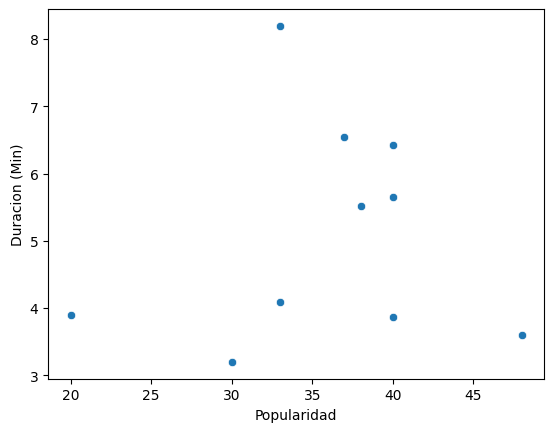

In [22]:
# Visualizacion

sns.scatterplot(x=df_best_10['Popularidad'], y=df_best_10['Duracion (Min)'])
plt.show()

Se evidencia que la duracion de la cancion no tiene relacion directa con la popularidad de las canciones.